<a href="https://colab.research.google.com/github/jamal221/Backend_Laravel_Post_Comment/blob/main/Predict_Gold_Price_by_Scrap_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# Define URL
url = 'https://www.tgju.org/profile/geram18/history'
# Ask hosting server to fetch url
requests.get(url)

<Response [200]>

In [3]:
pages = requests.get(url)
# pages.text

In [4]:
# parser-lxml = Change html to Python friendly format
soup = BeautifulSoup(pages.text, 'lxml')
# soup

In [5]:
table1 = soup.find('table')
# table1

In [9]:
# table1

In [8]:
# Obtain every td value in specific list
final_price = []
final_date=[]
for i in table1.find_all('tr'):
  valid_td=0
  valid_date_td=0
  for j in i.find_all('td'):
    # the fourth column is belong to final price of gold.
    if valid_td==3:
      # print(j.text)
      final_price.append(j.text)
    if valid_date_td==6:
      final_date.append(j.text)
    valid_td+=1
    valid_date_td+=1

In [10]:
final_price

['37,331,000',
 '37,093,000',
 '36,895,000',
 '37,063,000',
 '36,629,000',
 '36,523,000',
 '36,292,000',
 '36,066,000',
 '36,038,000',
 '36,454,000',
 '36,433,000',
 '36,754,000',
 '36,244,000',
 '36,320,000',
 '36,147,000',
 '35,883,000',
 '36,177,000',
 '35,872,000',
 '35,828,000',
 '35,759,000',
 '35,376,000',
 '35,560,000',
 '34,962,000',
 '34,775,000',
 '34,671,000',
 '34,752,000',
 '34,978,000',
 '35,422,000',
 '34,683,000',
 '35,221,000']

In [11]:
final_date

['2024/09/17',
 '2024/09/16',
 '2024/09/15',
 '2024/09/14',
 '2024/09/11',
 '2024/09/10',
 '2024/09/09',
 '2024/09/08',
 '2024/09/07',
 '2024/09/05',
 '2024/09/03',
 '2024/09/01',
 '2024/08/31',
 '2024/08/29',
 '2024/08/28',
 '2024/08/27',
 '2024/08/26',
 '2024/08/24',
 '2024/08/22',
 '2024/08/21',
 '2024/08/20',
 '2024/08/19',
 '2024/08/18',
 '2024/08/17',
 '2024/08/15',
 '2024/08/14',
 '2024/08/13',
 '2024/08/12',
 '2024/08/11',
 '2024/08/10']

In [12]:
mydata = pd.DataFrame(columns = ['Date1','End1'])

In [13]:
mydata['Date1']=final_date

In [14]:
mydata['End1']=final_price

In [15]:
mydata.head()

,Date1,End1
0,2024/09/17,"37,331,000"
1,2024/09/16,"37,093,000"
2,2024/09/15,"36,895,000"
3,2024/09/14,"37,063,000"
4,2024/09/11,"36,629,000"


In [16]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date1   30 non-null     object
 1   End1    30 non-null     object
dtypes: object(2)
memory usage: 608.0+ bytes


In [17]:
for i in range(len(mydata)):
  mydata['End1'][i]=mydata['End1'][i].replace(',','')
mydata.head()

,Date1,End1
0,2024/09/17,37331000
1,2024/09/16,37093000
2,2024/09/15,36895000
3,2024/09/14,37063000
4,2024/09/11,36629000


In [18]:
pd.to_numeric(mydata['End1'])

,End1
0,37331000
1,37093000
2,36895000
3,37063000
4,36629000
5,36523000
6,36292000
7,36066000
8,36038000
9,36454000


In [19]:
mydata['End1']=mydata['End1'].astype(int)

In [20]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date1   30 non-null     object
 1   End1    30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [21]:
mydata['Date1'] = pd.DatetimeIndex(mydata['Date1'])# Convert Object to time in dataframe
mydata.head()

,Date1,End1
0,2024-09-17,37331000
1,2024-09-16,37093000
2,2024-09-15,36895000
3,2024-09-14,37063000
4,2024-09-11,36629000


In [22]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date1   30 non-null     datetime64[ns]
 1   End1    30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 608.0 bytes


In [24]:
mydata.set_index('Date1')

,End1
Date1,
2024-09-17,37331000
2024-09-16,37093000
2024-09-15,36895000
2024-09-14,37063000
2024-09-11,36629000
2024-09-10,36523000
2024-09-09,36292000
2024-09-08,36066000
2024-09-07,36038000


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [27]:
p = Prophet()

In [28]:
data = mydata.rename(columns={# In prophet the feature  column is ds and the target column is y
    'Date1': 'ds',
    'End1': 'y'
})
data.head()

,ds,y
0,2024-09-17,37331000
1,2024-09-16,37093000
2,2024-09-15,36895000
3,2024-09-14,37063000
4,2024-09-11,36629000


In [29]:
p.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo81ledrf/bvuprspz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo81ledrf/55fpq_kj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75190', 'data', 'file=/tmp/tmpo81ledrf/bvuprspz.json', 'init=/tmp/tmpo81ledrf/55fpq_kj.json', 'output', 'file=/tmp/tmpo81ledrf/prophet_modelsomimcbp/prophet_model-20240918135330.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:53:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [42]:
future = p.make_future_dataframe(periods=30, freq='D')# the previous data has 30 rows
future

,ds
0,2024-08-10
1,2024-08-11
2,2024-08-12
3,2024-08-13
4,2024-08-14
5,2024-08-15
6,2024-08-17
7,2024-08-18
8,2024-08-19
9,2024-08-20


In [43]:
data

,ds,y
0,2024-09-17,37331000
1,2024-09-16,37093000
2,2024-09-15,36895000
3,2024-09-14,37063000
4,2024-09-11,36629000
5,2024-09-10,36523000
6,2024-09-09,36292000
7,2024-09-08,36066000
8,2024-09-07,36038000
9,2024-09-05,36454000


In [44]:
forecast = p.predict(future)

In [45]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-08-10,2.634225e+07,3.490387e+07,3.527665e+07,2.634225e+07,2.634225e+07,8.745090e+06,8.745090e+06,8.745090e+06,8.745090e+06,8.745090e+06,8.745090e+06,0.0,0.0,0.0,3.508734e+07
1,2024-08-11,2.626058e+07,3.476988e+07,3.513163e+07,2.626058e+07,2.626058e+07,8.689114e+06,8.689114e+06,8.689114e+06,8.689114e+06,8.689114e+06,8.689114e+06,0.0,0.0,0.0,3.494969e+07
2,2024-08-12,2.617890e+07,3.497543e+07,3.534396e+07,2.617890e+07,2.617890e+07,8.969268e+06,8.969268e+06,8.969268e+06,8.969268e+06,8.969268e+06,8.969268e+06,0.0,0.0,0.0,3.514817e+07
3,2024-08-13,2.609723e+07,3.470676e+07,3.509952e+07,2.609723e+07,2.609723e+07,8.807332e+06,8.807332e+06,8.807332e+06,8.807332e+06,8.807332e+06,8.807332e+06,0.0,0.0,0.0,3.490457e+07
4,2024-08-14,2.601556e+07,3.466759e+07,3.505319e+07,2.601556e+07,2.601556e+07,8.853849e+06,8.853849e+06,8.853849e+06,8.853849e+06,8.853849e+06,8.853849e+06,0.0,0.0,0.0,3.486941e+07
5,2024-08-15,2.593438e+07,3.461888e+07,3.500154e+07,2.593438e+07,2.593438e+07,8.870928e+06,8.870928e+06,8.870928e+06,8.870928e+06,8.870928e+06,8.870928e+06,0.0,0.0,0.0,3.480531e+07
6,2024-08-17,2.620166e+07,3.474896e+07,3.514473e+07,2.620166e+07,2.620166e+07,8.745090e+06,8.745090e+06,8.745090e+06,8.745090e+06,8.745090e+06,8.745090e+06,0.0,0.0,0.0,3.494675e+07
7,2024-08-18,2.633544e+07,3.483584e+07,3.521056e+07,2.633544e+07,2.633544e+07,8.689114e+06,8.689114e+06,8.689114e+06,8.689114e+06,8.689114e+06,8.689114e+06,0.0,0.0,0.0,3.502456e+07
8,2024-08-19,2.646923e+07,3.524714e+07,3.563243e+07,2.646923e+07,2.646923e+07,8.969268e+06,8.969268e+06,8.969268e+06,8.969268e+06,8.969268e+06,8.969268e+06,0.0,0.0,0.0,3.543850e+07
9,2024-08-20,2.660302e+07,3.522300e+07,3.560862e+07,2.660302e+07,2.660302e+07,8.807332e+06,8.807332e+06,8.807332e+06,8.807332e+06,8.807332e+06,8.807332e+06,0.0,0.0,0.0,3.541035e+07


In [46]:
data_predicted=forecast.iloc[30:,:]

In [47]:
data_predicted['yhat']

,yhat
30,3.741084e+07
31,3.754312e+07
32,-2.414820e+07
33,3.764766e+07
34,3.770688e+07
35,3.810223e+07
36,3.805548e+07
37,3.821719e+07
38,3.834946e+07
39,-2.334185e+07


In [48]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


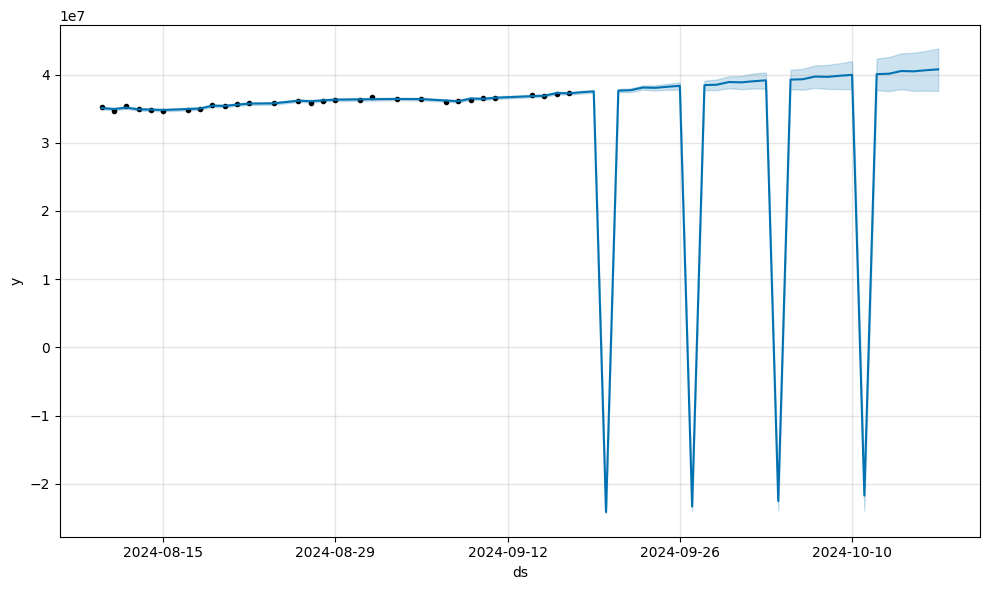

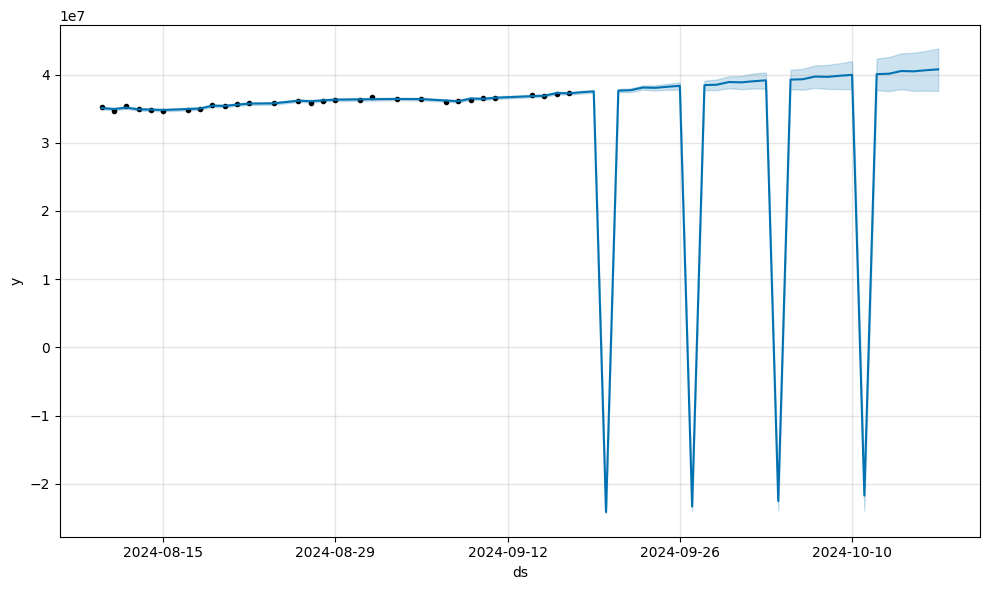

In [50]:
p.plot(forecast)